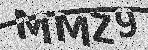

In [1]:
from PIL import Image
im = Image.open('code.png')
im

In [2]:
import cv2

In [3]:
import requests
with open('code.jpg','wb') as f:
    res = requests.get('http://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)

In [4]:
import numpy as np
im = Image.open('code.jpg').convert('RGB')
open_cv_image = np.array(im)

In [5]:
im2=Image.open('code.jpg')

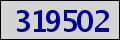

In [6]:
im2

In [7]:
open_cv_image

array([[[  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0]],

       [[ 14,  14,  14],
        [188, 188, 188],
        [215, 215, 215],
        ..., 
        [215, 215, 215],
        [188, 188, 188],
        [ 14,  14,  14]],

       [[  0,   0,   0],
        [217, 217, 217],
        [223, 223, 223],
        ..., 
        [223, 223, 223],
        [217, 217, 217],
        [  0,   0,   0]],

       ..., 
       [[  0,   0,   0],
        [217, 217, 217],
        [223, 223, 223],
        ..., 
        [223, 223, 223],
        [217, 217, 217],
        [  0,   0,   0]],

       [[ 14,  14,  14],
        [188, 188, 188],
        [215, 215, 215],
        ..., 
        [215, 215, 215],
        [188, 188, 188],
        [ 14,  14,  14]],

       [[  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [ 10,  10,  10],
        [  0,   0,

Populating the interactive namespace from numpy and matplotlib


c:\python27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


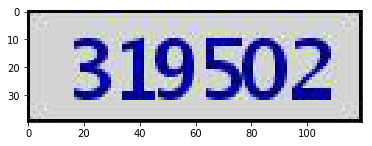

In [8]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(open_cv_image)

In [9]:
# 转为灰度图
imgray = cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)
# 
ret,thresh =cv2.threshold(imgray,127,255,0)
# plt.imshow(thresh)

contour,hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
type(hierarchy)
len(contour)

8

In [40]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   2,   2, ...,   2, 130,   0],
       [  0,   2,   1, ...,   1, 130,   0],
       ..., 
       [  0,   2,   1, ...,   1, 130,   0],
       [  0,   2,   2, ...,   2, 130,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [11]:
cnts = sorted([(c,cv2.boundingRect(c)[0]) for c in contour],key=lambda x:x[1])

In [30]:
cnts

[(array([[[  1,   1]],
  
         [[  1,  38]],
  
         [[118,  38]],
  
         [[118,   1]]]), 1), (array([[[18, 10]],
  
         [[19,  9]],
  
         [[25,  9]],
  
         [[29, 13]],
  
         [[29, 15]],
  
         [[28, 16]],
  
         [[28, 17]],
  
         [[26, 19]],
  
         [[26, 20]],
  
         [[27, 20]],
  
         [[29, 22]],
  
         [[29, 23]],
  
         [[30, 24]],
  
         [[30, 27]],
  
         [[29, 28]],
  
         [[29, 29]],
  
         [[28, 30]],
  
         [[27, 30]],
  
         [[26, 31]],
  
         [[25, 31]],
  
         [[24, 32]],
  
         [[18, 32]],
  
         [[17, 31]],
  
         [[16, 31]],
  
         [[14, 29]],
  
         [[14, 28]],
  
         [[13, 27]],
  
         [[13, 24]],
  
         [[14, 23]],
  
         [[14, 22]],
  
         [[16, 20]],
  
         [[17, 20]],
  
         [[15, 18]],
  
         [[15, 17]],
  
         [[14, 16]],
  
         [[14, 13]],
  
         [[17, 10]]]), 13), (a

In [12]:
arr=[]
for (c,_) in cnts:
    (x,y,w,h) =cv2.boundingRect(c)
    print ((x,y,w,h))

(1, 1, 118, 38)
(16, 9, 15, 24)
(33, 9, 14, 24)
(45, 9, 16, 24)
(50, 13, 6, 8)
(63, 9, 31, 24)
(81, 13, 8, 16)
(94, 9, 16, 24)
